# DSP - Aufgabenblatt 11

## Bewertete Übung

#### FHNW - HS2019

#### Vorgaben für die Zusammenarbeit

Sie dürfen für die Lösung der Übung zusammenarbeiten, so lange sich ihre **Zusammenarbeit auf konzeptionelle und algorithmische Fragestellungen beschränkt**. Bei kopiertem Code oder Text (von Mitstudierenden oder dem Internet) werden alle Lösungen der beteiligten Parteien mit 0 Punkten bewertet. Dazu werden alle Lösungen manuell und automatisiert auf Kopien untersucht.  

#### Abgabe

Arbeiten Sie auf einem eigenen Fork des Repositories `https://gitlab.fhnw.ch/ml/courses/dsp/dsp_hs2019.git` zu welchem Sie den Dozenten (@michael.graber) als *Maintainer* hinzufügen. Committen Sie regelmässig. Als Abgabe gilt ihr **letzter Commit vor Montag, 23. Dezember 2019, 24 Uhr**.

#### Hinweise
- Der *Code* muss von Anfang bis Ende durchlaufen. Es wird nur Code bewertet, welcher beim automatischen Durchlaufen ausgeführt wird.    
- Beschriften Sie sämtliche Achsen (Bezeichnung und Einheit wenn möglich).  
- Ergänzen Sie den Plot mit zusätzlicher Beschriftung falls dies zum Verständnis des Plots notwendig ist.  
- Wenn Sie einen Plot in einer Antwort diskutieren, beginnen Sie mit einer Beschreibung dessen was der Plot zeigt.  


- Sämtliche Variablen die in einer von Ihnen definierten Funktionen verwendet werden, müssen als Argumente übergeben  oder innerhalb der Funktion definiert werden.
- Selbst definierte Funktionen müssen einen (kurzen) docstring haben.


- Versuchen Sie eine kompakte und performante Implementierung zu finden. Vollständige Punktzahl erreichen Sie bloss mit performantem *Code*.  
- Verwenden Sie dazu, wo immer möglich und sinnvoll, Funktionen aus `pandas` und `numpy`.
- Vermeiden Sie *Loops* falls möglich.

Am 14. April 1912 ist die Titanic vor der Küste Neufundlands auf ihrer Jungfernfahrt mit einem Eisberg kollidiert und sank kanpp 3 Stunden später in den frühen Morgenstunden des 15. Aprils. Von den ca 2224 Passagieren und Crewmitgliedern starben rund 1500.  

Auf der Website https://www.encyclopedia-titanica.org/ können Passagier- und Crewlisten runtergeladen werden. Ich habe Ihnen zwei Dateien bereitgestellt: 'data/titanic_survivors.csv' und 'data/titanic_victims.csv'. Sie beinhalten jeweils die Überlebenden und Opfer des Unglücks.  

Wir werden in dieser Übung die Personen hinter diesem Unglück miteinander untersuchen.

### Aufgabe 1 (10 Punkte)  

Schreiben Sie eine Funktion, mit welcher Sie die beiden Dateien laden und präprozessieren können.  

Die Funktion soll ein `DataFrame` zurückgeben mit folgenden Spalten: `'name', 'sex', 'age', 'is_adult', 'job', 'class_dept', 'is_passenger', 'joined', 'boat_body', 'ticketprice', 'survived',`.  


- Der Ticketpreis steht bei Passagieren jeweils auf der folgenden Zeile im Feld `Ticket`. Extrahieren Sie Pfund, Shilling und Pence mittels *regular expression-matching* auf dem `DataFrame`.
- Berechnen Sie einen Dezimalbetrag in Pfund gemäss dem folgenden Satz: *'There were 12 pence in a shilling and 20 shillings in a pound.'* 
- Leiten Sie das Geschlecht `sex` aus dem Namen, insbesondere aus der Anrede, ab. Finden Sie einen geeignete `pandas`-Methode für das *Mapping*.
- Berechnenen Sie das Alter für alle Personen in Jahren (`m` steht für *months*).
- `is_passenger` soll `True` sein, falls `class_dept` in `['1st Class Passenger', '2nd Class Passenger', '3rd Class Passenger',]` ist.  
- Sortieren Sie das `DataFrame` nach dem Familiennamen.

Jeder *for-Loop* gibt 2 Punkte Abzug.  

Laden Sie die Daten und geben Sie die ersten 10 Zeilen aus.

In [1]:
import pandas as pd
import csv
import numpy as np


def createDataFrame(path1, path2):
    survivors_df = pd.read_csv(path1, skiprows=5, usecols=range(7))
    victims_df = pd.read_csv(path2, skiprows=5, usecols=range(7))
    df1 = cleanData(survivors_df)
    df2 = cleanData(victims_df)
    
    df1.insert(column='survived', value=True, loc=7)
    df2.insert(column='survived', value=False, loc=7)
    
    titanic_df = pd.concat([df1, df2], ignore_index=True)
    
    titanic_df.insert(column='sex', value=np.NaN, loc=1)
    titanic_df.sex = titanic_df.name.str.split('\xa0', n=2, expand=False).str[1]
    titanic_df.sex = titanic_df.sex.str.extract(pat='([A-Z][a-z]*)')
    
    #Zum herausfinden, was alles zum mappen ist: titanic_df.sex.unique()
    titanic_df.sex = titanic_df.sex.map({'Rev': 'male',
                                        'Fr': 'male',
                                        'Sr': 'male',
                                        'Sig': 'male',
                                        'Revd': 'male',
                                        'Miss': 'female',
                                        'Master': 'male',
                                        'Captain': 'male',
                                        'Do': 'female',
                                        'Sra': 'female',
                                        'Mme': 'female',
                                        'Mrs': 'female',
                                        'Sir': 'male',
                                        'Mr': 'male',
                                        'Colonel': 'male',
                                        'Major': 'male',
                                        'Dr': 'male',
                                        'Don': 'male',
                                        'Col': 'male',
                                        'Lucy': 'female',
                                        'Mlle': 'female'})
    titanic_df.loc[titanic_df.name.str.contains('Alice May') == True, ['sex']] = 'female'
    
    titanic_df.loc[titanic_df.age.str.contains('m') == True, ['age']] = titanic_df.age.str.split('m').str[0].astype(float) / 12
    
    titanic_df.insert(column='is_passenger', value=False, loc=5)
    titanic_df.loc[titanic_df.class_dept.str.contains('Class Passenger') == True, ['is_passenger']] = True
    
    titanic_df.insert(column='is_adult', value=np.NaN, loc=3)
    titanic_df.age = titanic_df.age.astype(float)
    titanic_df.loc[(titanic_df.age >= 18) == True, ['is_adult']] = True
    titanic_df.loc[(titanic_df.age < 18) == True, ['is_adult']] = False
    
    titanic_df.insert(column='pounds', value=0, loc=10)
    titanic_df.insert(column='shilling', value=0, loc=11)
    titanic_df.insert(column='pence', value=0, loc=12)
    titanic_df.pounds = titanic_df.ticketprice.str.extract(pat='£(\d*)', flags=0, expand=False)
    titanic_df.shilling = titanic_df.ticketprice.str.extract(pat='(\d*)s', flags=0, expand=False)
    titanic_df.pence = titanic_df.ticketprice.str.extract(pat='(\d*)d', flags=0, expand=False)
    titanic_df = titanic_df.fillna(value = {'pounds': 0, 'shilling': 0, 'pence': 0})
    titanic_df.ticketprice = titanic_df.pounds.astype(float) + (titanic_df.shilling.astype(float) / 20) + (titanic_df.pence.astype(float) / 240)
    titanic_df = titanic_df.drop(columns=['pounds', 'shilling', 'pence'])
    
    #titanic_df.loc[(titanic_df.job.isna()) == True, ['job']] = 'unknown'
    
    titanic_df = titanic_df.sort_values(by=['name'])
    titanic_df = titanic_df.reset_index(drop=True) 

    return titanic_df


In [2]:
def cleanData(df):
    """Cleans the Dataframe
    - Removes unneeded rows
    - Preparation for further calculations
    """
    df.insert(3, 'Ticketprice', np.NaN)
    df.loc[df.Ticket.str.contains('£|s|d') == True, ['Ticketprice']] = df.Ticket
    df.Ticketprice = df.Ticketprice.shift(-1)
    df = df.dropna(subset=['Name'])
    df = df.drop(columns=['Ticket'])
    df = df.rename(columns={'Ticketprice':'ticketprice',
                                            'Name':'name',
                                            'Age':'age',
                                            'Job':'job',
                                            'Class/Dept':'class_dept',
                                            'Joined':'joined',
                                            'Boat [Body]':'boat_body'})
    df = df[['name','age','job','class_dept','joined','boat_body','ticketprice']]
    return df

In [3]:
titanic_df = createDataFrame("../../data/titanic_survivors.csv", "../../data/titanic_victims.csv")
titanic_df.to_csv('titanic.csv')
titanic_df.head(10)

,name,sex,age,is_adult,job,class_dept,is_passenger,joined,boat_body,ticketprice,survived
0,"ABBING, Mr Anthony",male,41.0,True,Blacksmith,3rd Class Passenger,True,Southampton,NaN,7.550,False
1,"ABBOTT, Mrs Rhoda Mary 'Rosa'",female,39.0,True,NaN,3rd Class Passenger,True,Southampton,A,20.250,True
2,"ABBOTT, Mr Ernest Owen",male,21.0,True,Lounge Pantry Steward,Victualling Crew,False,Southampton,NaN,0.000,False
3,"ABBOTT, Mr Eugene Joseph",male,13.0,False,Scholar,3rd Class Passenger,True,Southampton,NaN,20.250,False
4,"ABBOTT, Mr Rossmore Edward",male,16.0,False,Jeweller,3rd Class Passenger,True,Southampton,[190],20.250,False
5,"ABELSETH, Miss Karen Marie",female,16.0,False,NaN,3rd Class Passenger,True,Southampton,16,7.650,True
6,"ABELSETH, Mr Olaus Jørgensen",male,25.0,True,Farmer,3rd Class Passenger,True,Southampton,A,7.650,True
7,"ABELSON, Mrs Anna",female,24.0,True,NaN,2nd Class Passenger,True,Cherbourg,10,24.000,True
8,"ABELSON, Mr Samuel",male,30.0,True,NaN,2nd Class Passenger,True,Cherbourg,NaN,24.000,False
9,"ABRAHAMSSON, Mr August Abraham Johannes",male,19.0,True,NaN,3rd Class Passenger,True,Southampton,15,7.925,True


### Aufgabe 2 (8 Punkte)

Wieviele Personen sind es insgesamt?  

Wieviele Personen ohne Ticketpreis?  

Wieviele Personen ohne Altersangabe?  

Wieviele Personen männlichen und weiblichen Geschlechts fanden sich gemäss unserem Datensatz auf der Titanic?  

Wie viele Kinder, welchen Geschlechts?  

Was war der durchschnittliche Preis für eine Fahrkarte?  

Was war das Durchschnittsalter der Besatzungsmitglieder? Was war das Durchschnittsalter der Passagiere?

In [4]:
print("Es sind", titanic_df.shape[0], "Personen.")
print("Es gibt", (titanic_df.ticketprice == 0).sum(), "Personen ohne Ticketpreis.")
print("Es gibt", (titanic_df.age.isna().sum()), "Personen ohne Altersangabe.")
print("Es gibt", (titanic_df.sex == 'male').sum(), "männliche und", (titanic_df.sex == 'female').sum(), "weibliche Personen.")

children_df = titanic_df.loc[titanic_df.is_adult == False]
children_df = children_df.loc[children_df.age.isna() == False] 
print("Es gibt", (children_df.sex == 'male').sum(), "männliche und", (children_df.sex == 'female').sum(), "weibliche Kinder.")

crew_df = titanic_df.loc[titanic_df.is_passenger == False]
crew_df = crew_df.loc[crew_df.age.isna() == False] 
passengers_df = titanic_df.loc[titanic_df.is_passenger == True]
print("Der durchschnittliche Ticketpreis beträgt", round(passengers_df.ticketprice.mean(), 2), "£.")
passengers_df = passengers_df.loc[passengers_df.age.isna() == False] 
print("Das durchschnittliche Alter der Crew beträgt", round(crew_df.age.astype(float).mean(), 2), "Jahre.")
print("Das durchschnittliche Alter der Passagiere beträgt", round(passengers_df.age.astype(float).mean(), 2), "Jahre.")

Es sind 2208 Personen.
Es gibt 917 Personen ohne Ticketpreis.
Es gibt 3 Personen ohne Altersangabe.
Es gibt 1719 männliche und 489 weibliche Personen.
Es gibt 121 männliche und 82 weibliche Kinder.
Der durchschnittliche Ticketpreis beträgt 33.09 £.
Das durchschnittliche Alter der Crew beträgt 31.73 Jahre.
Das durchschnittliche Alter der Passagiere beträgt 29.63 Jahre.


### Aufgabe 3 (3 Punkte)

Erstellen Sie eine Kreuztabelle von Einstiegsort und `class_dept`.  

Visualisieren Sie die Tabelle.  
Wir wissen, dass die Titanic von *Belfast*, wo sie gebaut wurde, nach *Southhampton*, nach *Cherbourg* und dann nach *Queenstown* fuhr, bevor Sie zur Atlantiküberfahrt auslief.  

Diskutieren Sie Ihre Erkenntnisse.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

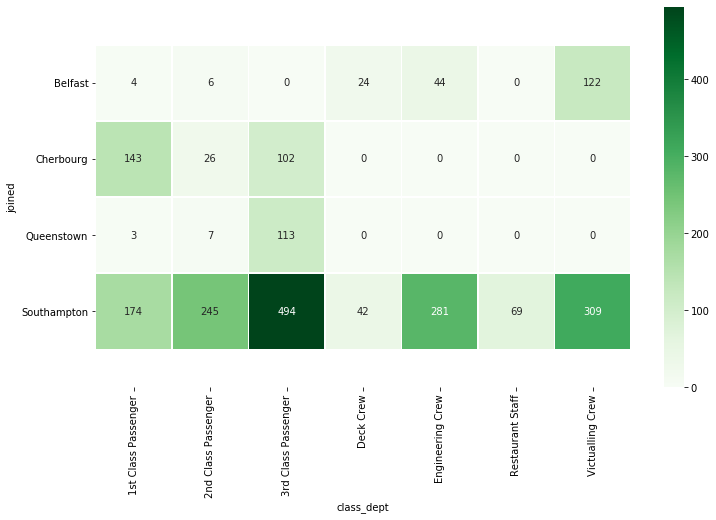

In [6]:
crosstab = pd.crosstab(titanic_df.joined, titanic_df.class_dept)
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(crosstab, cmap='Greens', linewidths=0.5, annot=True, fmt='g')
plt.yticks(rotation=0)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 1 # Add 0.5 to the bottom
t -= 1 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Der Plot zeigt die Menge an Personen, die in den jeweiligen Häfen eingestiegen sind, wobei unterschieden wird, welche Preisklasse die Passagiere haben und zu welcher Crew die Crewmitglieder gehören. Am ersten Hafen Belfast (wo sie gebaut wurde) war bis auf ein paar wenige Passagiere (aber niemand aus der dritten Preisklasse) fast nur Leute von der Versorgungscrew, Engineering Crew und der Deckcrew anwesend, wobei die Versorgungscrew mit 122 den grössten Teil ausmacht.
In Southampton kam der Grossteil der Passagiere an Borde so wie der grosse Rest der Crew, die dann vollständig war. In Cherbourg und Queenstown kam noch der Rest der Passagiere dazu. 

### Aufgabe 4 (5 Punkte)

Visualisieren Sie die Altersverteilung für die beiden Geschlechter und gleichzeitig für Variable `class_dept` mit Boxplots.  

Diskutieren Sie die Visualisierung.
- Erklären Sie was ein Boxplot zeigt.
- Was für Information fehlt?
- Was können wir zu den vorliegenden Daten aus dieser Darstellung lesen?

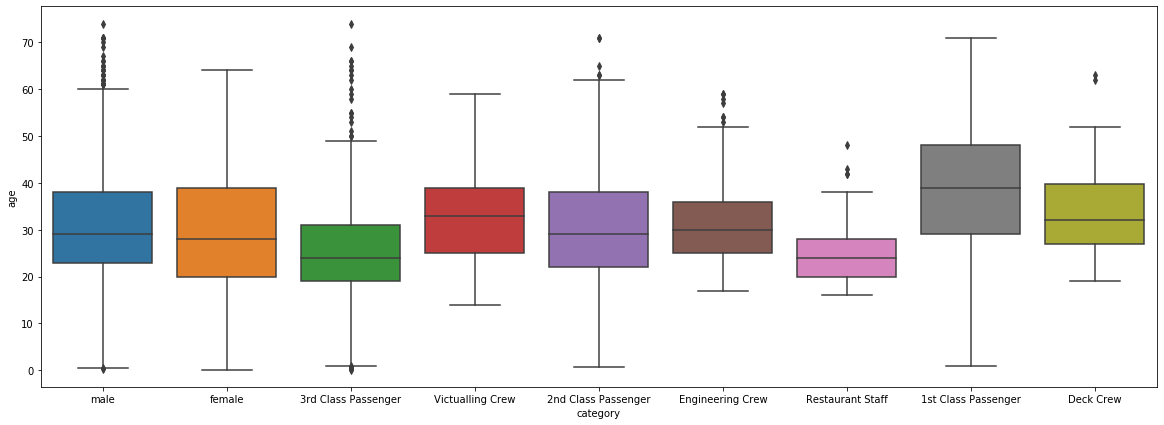

In [7]:
titanic_df_copy = titanic_df.copy()
age_df = titanic_df.copy()
age_df.sex = age_df.class_dept
ageplot_df = pd.concat([titanic_df_copy, age_df], ignore_index=False)
ageplot_df = ageplot_df.rename(columns = {'sex':'category'})
fig, ax = plt.subplots(figsize=(20,7))
sns.boxplot(x='category', y='age', data=ageplot_df)
plt.show()

Ein Boxplot zeigt folgende Kennwerte: unteres Quartil (1. Quartil), Median (2. Quartil), oberes Quartil (3. Quartil), Minimum und Maximum. Ausserdem können noch folgende Kennwerte indirekt abgelesen werden: Interquartilsabstand, Spannweite und Schiefe. Die Punkte ober- und unterhalb der Whisker zeigen ausserdem Ausreisser (also Werte ausserhalb des Interquartilsabstands) an. Er zeigt also eine Übersicht der Verteilung der vorliegenden Daten. Was man allerdings nicht sieht ist die Anzahl an vorliegenden Daten oder die Grösse des Datensatzes.
Folgendes können wir aus der vorliegenden Darstellung ablesen:
* Geschlecht: Das Alter der weiblichen Personen ist etwas mehr gestreut, während es bei den männlichen einige Ausreisser nach oben gibt. Dass bei vielen paaren die Frau etwas jünger ist als der Mann lässt sich damit das etwas weiter unten liegende erste Quartil erklären. 
* Passagierklassen: Der Altersschnitt der dritten Klasse ist am tiefsten, daher werden die meisten Familien mit Kindern dort aufzufinden sein. Die erste Klasse hat den höchsten Altersdurchschnitt, was damit zu tun haben könnte, dass vor Ältere, Reiche und Rentner sich diese Preisklasse leisten können/wollen. 
* Crew: Bei allen Crews sind die Daten Linksverschoben, was heisst dass der Grossteil der Crewmitglieder eher Jünger ist. Generell ist die Restaurantbesatzung die jüngste Crew, was vermutlich durch die Anwesenheit vieler (gut aussehender) junger Kellnerinnen und Kellner erklärt werden könnte. Dass ausserdem bei keiner Crew einen Ausreisser über ~65 existiert erscheint logisch, da damals das Rentneralter um die 70 war.

### Aufgabe 5 (4 Punkte)

Zeichnen Sie die Verteilung des Alters sämtlicher Passagiere als Histogramm.  

Beschreiben Sie die Verteilung bezüglich Lage, Streuung und Form.  

Sie dürfen verschiedene Ansätze verwenden und deren Resultate und Eigenschaften diskutieren.

In [8]:
from scipy import stats

def drawHist(data, xLabel, stoch):
    """
    Draws a Histrogram of the given data, calculates several stochastic parameters and prints them
    """
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data)[0].astype(float)
    
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    sigma = np.std(data)
    
    
    bins = np.arange(min(data), max(data) + 1, 1)
    fig, ax = plt.subplots(figsize=(12,7))
    plt.hist(data, bins=bins, histtype='bar') 
    plt.title("histogram")
    plt.xlabel(xLabel)
    plt.ylabel('count')
    if(stoch == True):
        plt.axvline(mean, color='lightgreen', linewidth=2)
        plt.text(mean+1,5,'mean: %f' % mean,rotation=90, color='lightgreen')
        plt.axvline(median, color='orange', linewidth=2)
        plt.text(median-2,5,'median %f' % median,rotation=90, color='orange')
        plt.axvline(mode, color='purple', linewidth=2)
        plt.text(mode-2,5,'mode %f' % mode,rotation=90, color='purple')
    plt.show()
    
    print("Minimum: ", round(data.min(),3))
    print("Maximum: ", round(data.max(),3))
    print("Mittelwert: ", round(mean,3))
    print("Median: ", round(median,3))
    print("Modus: ", round(mode[0],3))
    print("Standardabweichung: ", round(sigma, 3))
    print("1. Quartil: ", round(q1,3))
    print("3. Quartil: ", round(q3,3))
    print("Quartilsdifferenz: ", round(iqr,3))

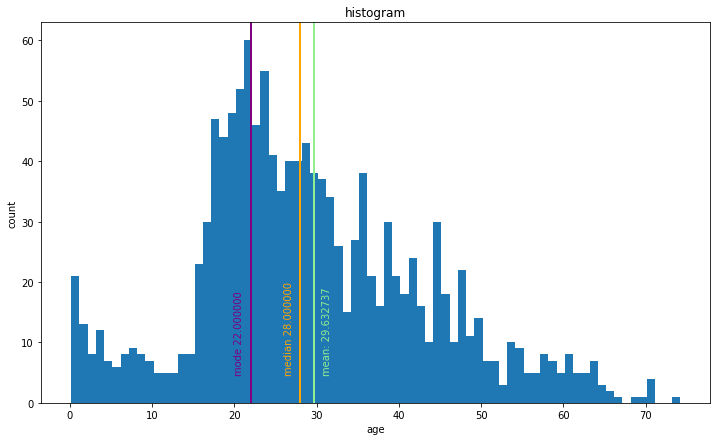

Minimum:  0.167
Maximum:  74.0
Mittelwert:  29.633
Median:  28.0
Modus:  22.0
Standardabweichung:  13.893
1. Quartil:  21.0
3. Quartil:  38.0
Quartilsdifferenz:  17.0


In [9]:
drawHist(passengers_df.age, 'age', True)

Der Plot zeigt die Verteilung des Alters der Passagiere. Die Crew ist hier nicht miteinbezogen. 
* Lage: Der Wertebereich befindet sich zwischen 0.167 (2 Monate) und 74 Jahre. Der Median ist ewas kleiner als der Mittelwert. Der Grossteil der Werte befindet sich in diesem Bereich. Der häufigste Wert 22 ist allerdings noch kleiner, was eine Rechtsschiefe andeutet
* Streuung: Die Standardabweichung beträgt 13.839 Jahre. Das heisst, die meisten Werte befinden sich zwischen 29.633 +- 13.839. Die Grenze der unteren 25% liegt bei 21 und diejenige der oberen unteren 75% bei 38 bei einer Quartilsdifferenz von 17. Auch ersichtlich ist, dass es eine erhebliche Anzahl an Kleinkinder hat, viele davon weniger als 1 Jahr alt.
* Form: Die Form des Histograms ist Rechtsschief und assymmetrisch, jedoch nicht Long-Tailed.

### Aufgabe 6 (3 Punkte)

Führen Sie die Schritte aus Aufgabe 5 für den Ticketpreis aus.  

Visualisieren Sie zusätzlich die kumulative Verteilung.  

Diskutieren Sie Ihre Erkenntnisse.

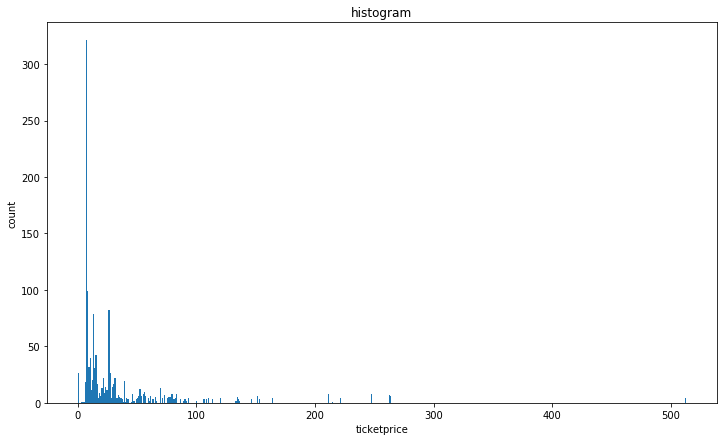

Minimum:  0.0
Maximum:  512.329
Mittelwert:  33.146
Median:  14.454
Modus:  8.05
Standardabweichung:  51.945
1. Quartil:  7.896
3. Quartil:  31.275
Quartilsdifferenz:  23.379


In [10]:
drawHist(passengers_df.ticketprice, 'ticketprice', False)

Das Histogram zeigt die Verteilung des Ticketpreises, wobei die Ticketpreise der Crew nicht miteinberechnet werden. Der Modus liegt bei 8.05£, was vermutlich der Standardpreis für ein Ticket der dritten Klasse ist.
* Lage: Der Wertebereich befindet sich zwischen 0 (Gratis) und 512.329 Pfund. Der Median ist deutlich kleiner als der Mittelwert. Der Grossteil der Werte befindet sich in diesem Bereich. Es gibt nur wenige Werte über dem Mittelwert, dafür sind dies sehr hohe Ausreisser.
* Streuung: Die Standardabweichung beträgt 51.945 Pfund. Das heisst, die meisten Werte befinden sich zwischen 33.146 +- 51.945 Pfund. Die Grenze der unteren 25% liegt bei 7.896£ und diejenige der oberen unteren 75% bei 31.275£ bei einer Quartilsdifferenz von 23.379£
* Form: siehe unten

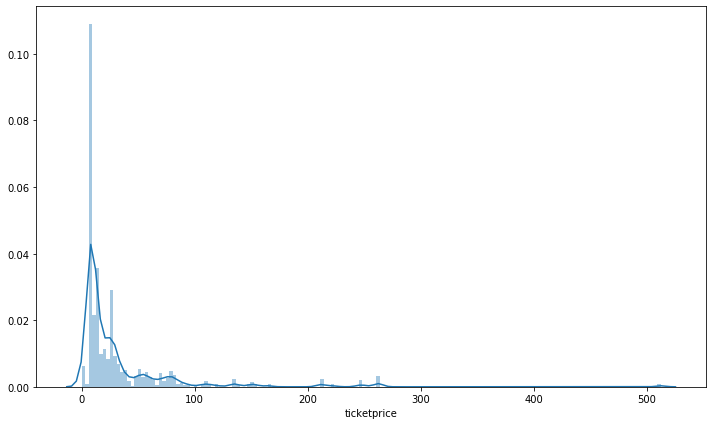

In [11]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(passengers_df.ticketprice, bins=((len(passengers_df.ticketprice) // 8) + 1))
plt.show()

* Form: Um die Form besser betrachten zu können habe ich einen zusätzlichen Plot gezeichnet, der diese stärker betont. Die Form zeigt eine starke Heavy-Tail-Verteilung nach rechts.

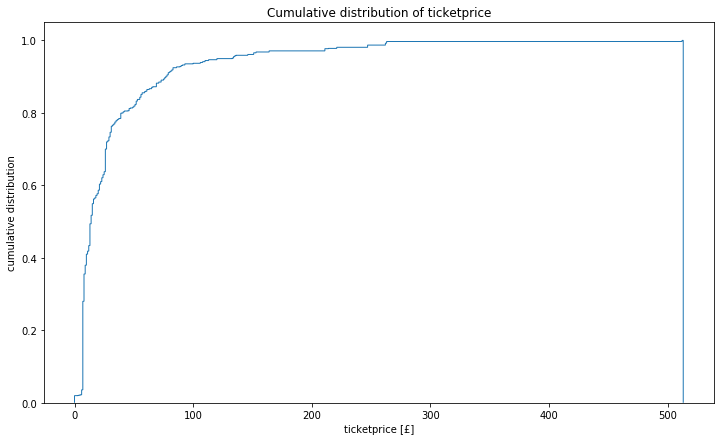

In [12]:
n_bins = bins = np.arange(min(passengers_df.ticketprice), max(passengers_df.ticketprice) + 1, 1)
fig, ax = plt.subplots(figsize=(12, 7))
n, bins, patches = ax.hist(passengers_df.ticketprice, n_bins, density=True, histtype='step', cumulative=True, label='Empirical')
ax.set_title('Cumulative distribution of ticketprice')
ax.set_xlabel('ticketprice [£]')
ax.set_ylabel('cumulative distribution')
plt.show()

Die kumulative Verteilung hat eine logarithmische Form und zeigt, dass der Grossteil der Anzahl Tickets schon nach wenigen Pfund erreicht wird. An Anfang gibt es einen kleinen Sprung wegen den Gratistickets, danach beginnt die starke Steigung mit den ~8£ Tickets.

### Aufgabe 7 (3 Punkte)

Was sind die häufigsten 10 Berufe der Passagiere, welche oberhalb des $Q_{0.9}$-Quantils des Ticketpreises liegen?  

Was sind die häufigsten 10 Berufe der Passagiere, welche unterhalb des $Q_{0.1}$-Quantils des Ticketpreises liegen?  

Wie oft kommen die Berufe jeweils vor?  
Wie interpretieren Sie das Resultat?

Q0.1-Quantil: 7.529583333333333
Q0.9-Quantil: 77.95833333333334



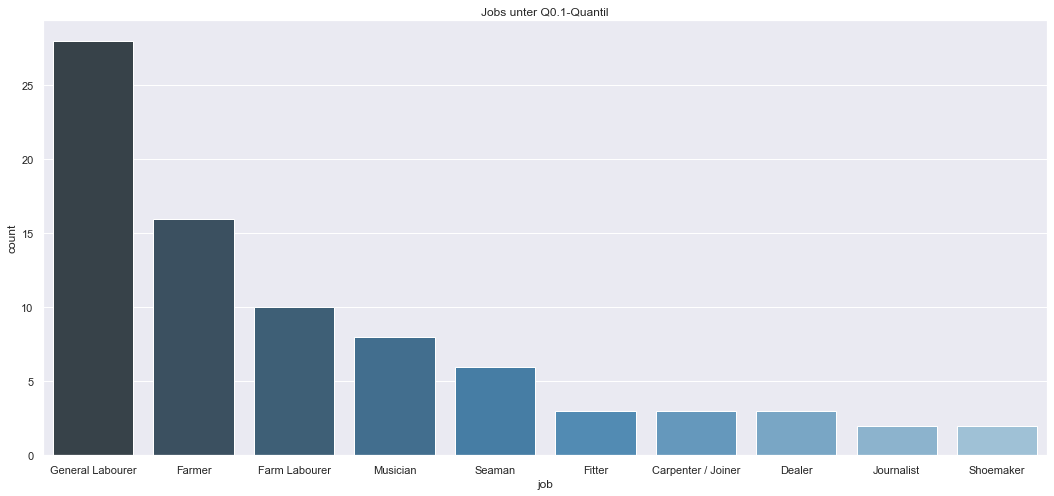

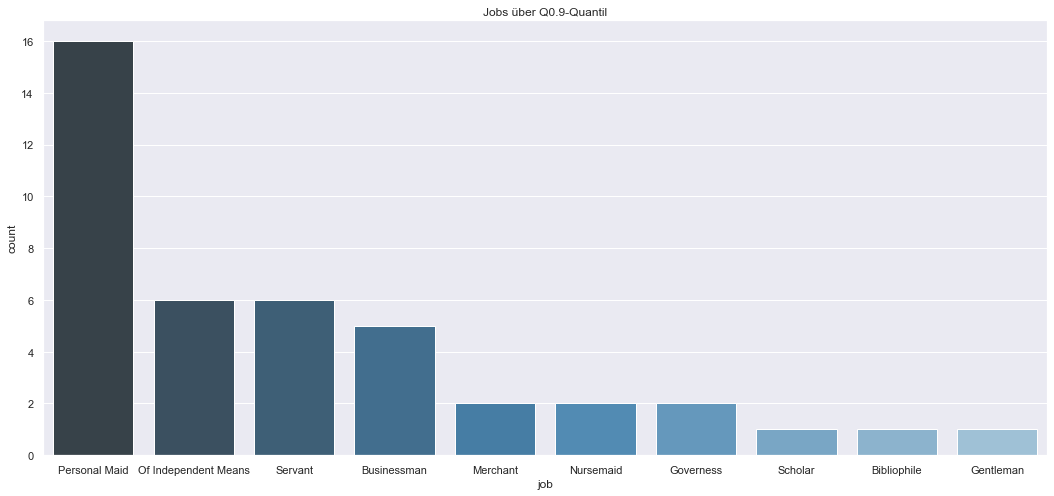

In [13]:
sns.set(style='darkgrid')

q01, q09 = np.percentile(passengers_df.ticketprice, [10, 90])
print("Q0.1-Quantil:", q01)
print("Q0.9-Quantil:", q09)
print()

Q01_df = passengers_df.loc[(passengers_df.ticketprice < q01) == True]
fig, ax = plt.subplots(figsize=(18,8))
sns.countplot(x=Q01_df.job, data=Q01_df, order=Q01_df.job.value_counts().iloc[:10].index, palette='Blues_d').set_title('Jobs unter Q0.1-Quantil')
plt.show()
print()
Q09_df = passengers_df.loc[(passengers_df.ticketprice > q09) == True]
fig, ax = plt.subplots(figsize=(18,8))
sns.countplot(x=Q09_df.job, data=Q09_df, order=Q09_df.job.value_counts().iloc[:10].index, palette='Blues_d').set_title('Jobs über Q0.9-Quantil')
plt.show()

Die Abbildungen zeigen die 10 häufigsten Jobs der Passagiere unter dem Q0.1-Quantil, respektive über dem Q0.9-Quantil des Ticketpreises. Die Jobs im unteren Quantil sind meistens handwerkliche, einfache Berufe. Beim oberen Quantil sind Begleitpersonen von Geschäftsleuten und noblen diejenigen, die am häufigsten vorkommen. Das ist nicht weiter verwunderlich, da diejenigen Berufe, die eine Begleitperson (Persönliche Maid und Diener) mitnehmen würden verteilt sind (Selbstständig. Es gibt einige Berufe, die nur ein mal vorkommen wie die letzten 3 dieser Darstellung, daher wären sie alle Teil der 10, die am meisten vorkommen. Aus Gründen der Übersichtlichkeit habe ich mit dagegen entschieden, diese auch in den Plot aufzunehmen und begnüge mich mit einer kleinen Auswahl von denen, die 1 mal vorkommen (Scholar, Bibliophile und Gentleman).

### Aufgabe 8 (6 Punkte)

Finden Sie ein paar wenige Visualisierungen, welche es ermöglichen, kompakt einen Eindruck zu bekommen, wer das Unglück der Titanic am wahrscheinlichsten überlebt hat.  

Was ist ihre Erkenntnis?

In [14]:
male_df = titanic_df.loc[titanic_df.sex == 'male']
female_df = titanic_df.loc[titanic_df.sex == 'female']

def drawSurvivedCountplot(x, hue, title):
    """
    Draws a countplot with the given x-axis, hue, title and shows percentages of the hues
    """
    totals = x.value_counts()
    n_hues = hue.unique().size
    
    fig, _ = plt.subplots(figsize=(12,5))
    ax = sns.countplot(x, hue=hue, order=totals.index, palette=["#bc3d1e", "#00aa2b"])
    ax.set_xlabel(x.name, fontsize=15)
    ax.set_ylabel("count", fontsize=15)
    plt.title(title, fontsize=18)
    plt.tight_layout()
    
    # Quelle der Prozentangaben:
    #https://stackoverflow.com/questions/57754482/is-there-a-way-i-can-get-the-total-of-a-hue-seaborn-bar-graph-countplot-to-total
    temp_totals = totals.values.tolist()*n_hues
    for p,t in zip(ax.patches,temp_totals):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.1%}'.format(height/t),
            ha="center")
    
    plt.show()

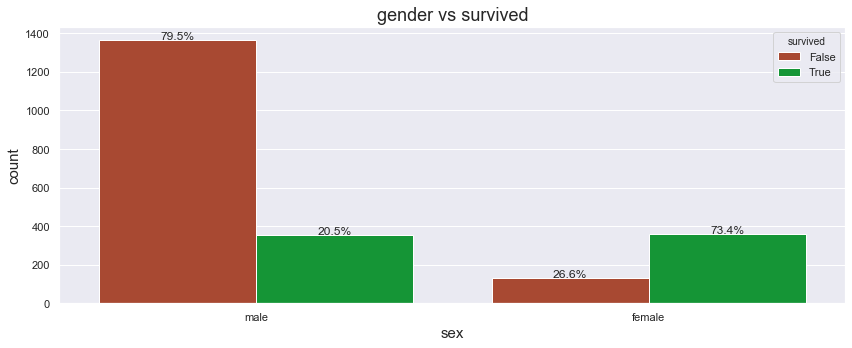

In [15]:
drawSurvivedCountplot(titanic_df.sex, titanic_df.survived, "gender vs survived")

Die Darstellung zeigt die Überlebenswahrscheinlichkeiten in Abhängigkeit des Geschlechts und die Anzahl der Gestorbenen und Überlebenden. Von den weiblichen personen haben 73.4% überlebt, von männlichen lediglich 20.5%. Trotz dieses respektiven Verhältnisses haben fast gleich viele weibliche wie männliche Personen überlebt, da es viel weniger weibliche Personen auf dem Schiff gab als männliche.

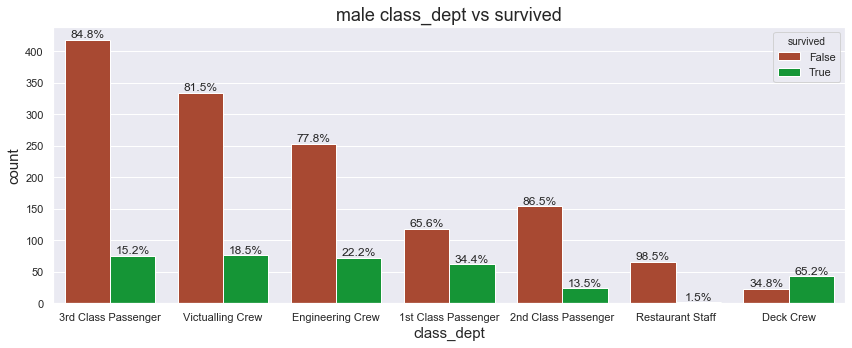

In [16]:
drawSurvivedCountplot(male_df.class_dept, male_df.survived, "male class_dept vs survived")

Die Darstellung zeigt die Überlebenswahrscheinlichkeiten der männlichen Personen in Abhängigkeit der Preisklasse und des Crewbereichs, und die Anzahl der Gestorbenen und Überlebenden. Auffällig ist die extrem geringe Überlebenswahrscheinlichkeit der männlichen Restaurantmitarbeiter von lediglich 1.5%, also einer einzigen Person. Auch haben Personen der ersten Preisklasse mit 34.4% eine viel höhere Überlebenschance als in der Zweiten und Dritten (13.5% und 15.2%). Ausserdem haben Mitglieder der Deckcrew eine Überlebenschance von 65.2%, was damit die einzige Kategorie an männlichen Personen mit über 50% Überlebenswahrscheinlichkeit ausmacht.

posx and posy should be finite values
posx and posy should be finite values


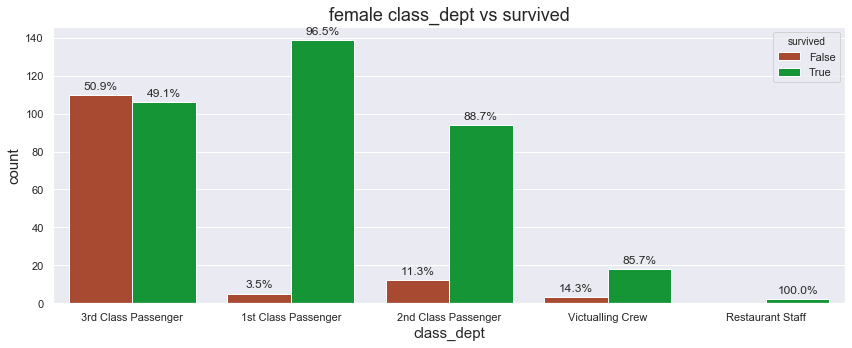

In [17]:
drawSurvivedCountplot(female_df.class_dept, female_df.survived, "female class_dept vs survived")

Die Darstellung zeigt die Überlebenswahrscheinlichkeiten der weiblichen Personen in Abhängigkeit der Preisklasse und des Crewbereichs, und die Anzahl der Gestorbenen und Überlebenden. Wie bei den männlichen Personen haben auch hier die Passagiere der ersten Preisklasse mit 96.5% die höchste Überlebenswahrscheinlichkeit. Weibliche Passagiere der dritten Preisklasse haben mit 50.9% mit massivem Abstand zu den 14.3% der Versorgungscrew die geringsten Überlebenschancen. Auch ersichtlich ist, dass die Engineering- und die Deckcrew gar keine Frauen beinhalteten. Die paar wenige Frauen, welche im Restaurant arbeiteten haben alle übelebt. 

Fazit: Von den männlichen Passagieren haben Personen aus der ersten Preisklasse am ehensten übelebt, von der Besatzung waren es Crewmitglieder der Deckcrew. Vermutlich ist diese so hoch, weil die Crewmitglieder dieser Crew beim Einstieg in die Rettungsboote geholfen haben und diese auch steuerten. Bei den Weiblichen Personen haben die Passagiere der ersten Preisklasse und die Mitarbeiterinnen des Restaurants am ehensten überlebt.

Ich verzichte hier auf weitere Visualisierungen des Alters, da dies in Aufgabe 9 behandelt wird.

### Aufgabe 9 (6 Punkte)

Untersuchen Sie nun, ob das Alter einen Einfluss auf die Überlebenswahrscheinlichkeit hatte.  

Teilen Sie die Passagiere dazu in Gruppen von Geschlecht und Altersjahrzenten ein.  
Berechnen Sie für die jeweiligen Gruppen den Anteil der Überlebenden, sowie den [*Standard Error of the Mean* (SEM)](https://en.wikipedia.org/wiki/Standard_error).  

Visualisieren Sie die Resultate übersichtlich und diskutieren Sie diese.  
Was können wir durch die Visualisierung des SEM erkennen?

In [18]:
agegroups_df = passengers_df.copy()
agegroups_df = agegroups_df.loc[agegroups_df.age.isna() == False]
agegroups_df.insert(column='age_group', value=np.NaN, loc=3)
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
agegroups_df.age_group = pd.cut(titanic_df.age, range(0, 81, 10), right=False, labels=age_labels)

agegroups_df.head()

,name,sex,age,age_group,is_adult,job,class_dept,is_passenger,joined,boat_body,ticketprice,survived
0,"ABBING, Mr Anthony",male,41.0,40-49,True,Blacksmith,3rd Class Passenger,True,Southampton,NaN,7.55,False
1,"ABBOTT, Mrs Rhoda Mary 'Rosa'",female,39.0,30-39,True,NaN,3rd Class Passenger,True,Southampton,A,20.25,True
3,"ABBOTT, Mr Eugene Joseph",male,13.0,10-19,False,Scholar,3rd Class Passenger,True,Southampton,NaN,20.25,False
4,"ABBOTT, Mr Rossmore Edward",male,16.0,10-19,False,Jeweller,3rd Class Passenger,True,Southampton,[190],20.25,False
5,"ABELSETH, Miss Karen Marie",female,16.0,10-19,False,NaN,3rd Class Passenger,True,Southampton,16,7.65,True


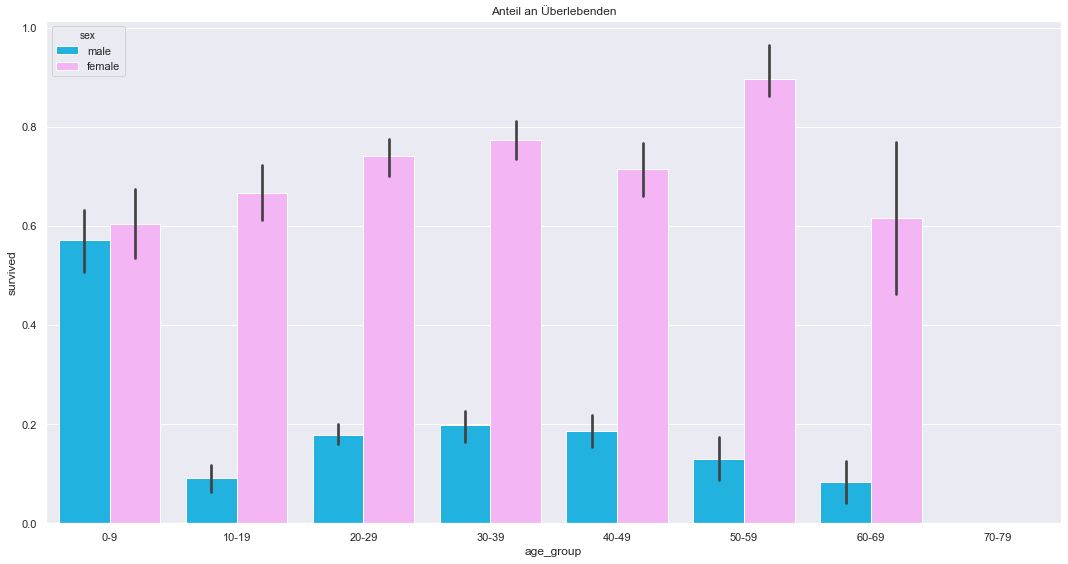

In [19]:
fig, _ = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=agegroups_df.age_group, y=agegroups_df.survived, hue=agegroups_df.sex, palette=["#01c3ff", "#ffabff"], ci=68) # ci=68 zeigt SEM
plt.title("Anteil an Überlebenden")
plt.tight_layout()

Die Abbildung zeigt, wie gross die Anteile an Überlebenden in Altersklassen so wie Geschlecht sind. Der Schwarze Strich bei jedem Balken zeigt ausserdem den Standard Error of Mean an (also Mittelwert in höhe des Balkens +- SEM). Von den männlichen Personen haben Kinder im alter von 0-9 Jahren die höchste Überlebenswahrscheinlichkeit. Da männlich/weiblich bei den Kindern ungefähr die gleiche Anteile haben, lässt sich daraus schliessen, dass alle Kinder bei der Rettung gleich behandelt wurden. Mädchen im alter von 0-9 Jahren hatten aber die kleinsten Überlebenschancen bei den weiblichen Personen. Die höchste Überlebenschancen hatten Frauen im Alter von 50-59 Jahren. Wenn man dies mit dem Plot "female class_dept vs survived" aus der Aufgabe 8 vergleicht, könnten viele von diesen in der ersten Preisklasse sein. Von den männlichen Personen hatten Personen im alter von 10-19 und 60-69 die kleinsten Überlebenschancen. Von den männlichen Personen hatten Personen über 70 wurden keine gerettet (Frauen gab es keine).

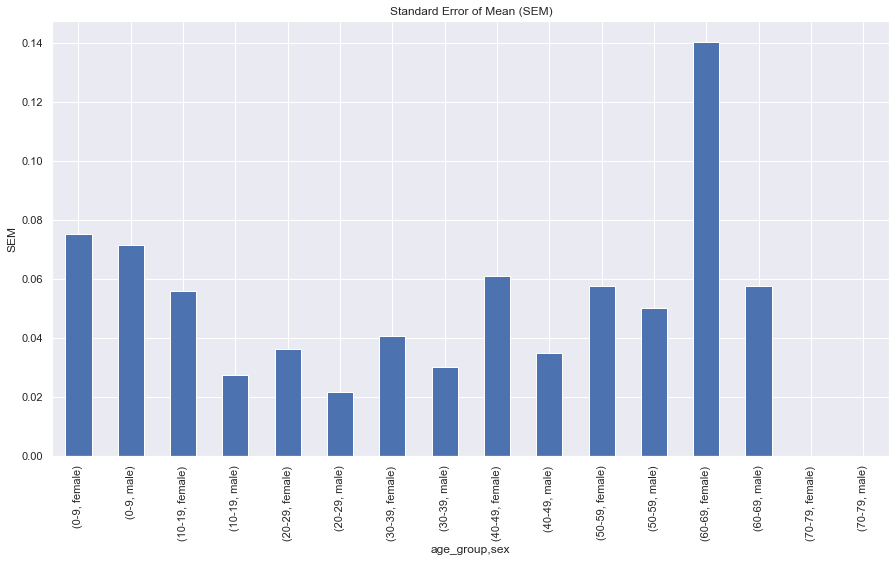

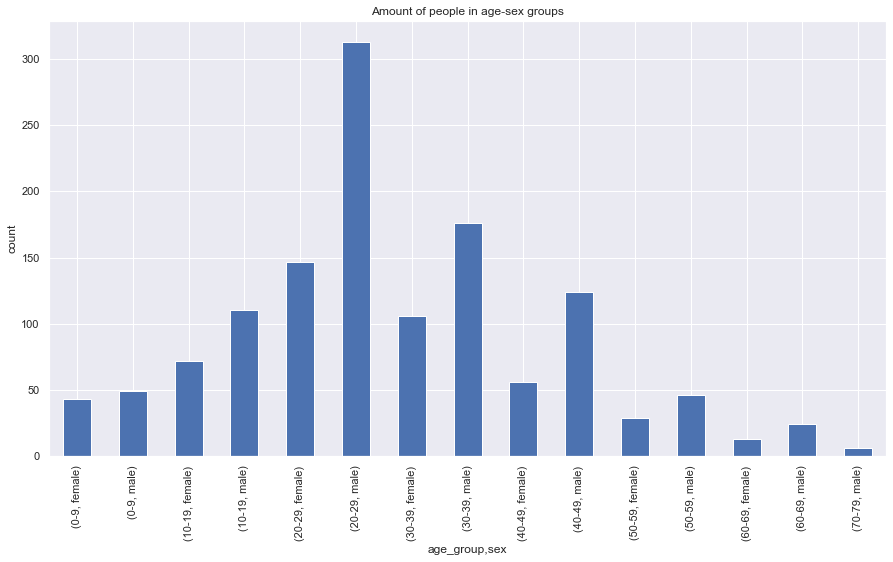

In [20]:
fig2 = agegroups_df.groupby(['age_group','sex',]).survived.sem().plot(kind='bar', figsize=(15,8), title='Standard Error of Mean (SEM)')
fig2.set_ylabel("SEM")
plt.show()
fig3 = agegroups_df.groupby(['age_group','sex',]).survived.count().plot(kind='bar', figsize=(15,8), title='Amount of people in age-sex groups')
fig3.set_ylabel("count")
plt.show()

Der obere Plot zeigt den Standard Error of Mean der jeweiligen altersklassen, während der untere die Anzahl an Personen in den jeweiligen Klassen darstellt. Der SEM hängt, neben der Varianz in der Grundgesamtheit, von dem Stichprobenumfang ab. Je tiefer der SEM, desto mehr samples stehen zur Verfügung und desto genauer wird die Schätzung. Dies zeigt der Vergleich der zwei hier dargestellten Plots. die Gruppe (20-29, male) hat die höchste Anzahl an Personen, wobei der SEM dieser Gruppe den tiefsten Wert hat. Der höchstte SEM hat die Gruppe (60-69, female), obwohl die Gruppe (70-79, male) noch weniger Personen beinhaltet. Das liegt daran, dass in letzterer keine Person überlebt hat und daher deren Mittelwert von Survived = 0 ist. Durch die Visualisierung des SEM können wir also die Grösse der Gruppen in Relation zu den anderen Gruppen Schätzungsweise ansehen.